### (1) DATASET COLLECTION:

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df.shape

(114000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### (2) DATA PREPROCESSING

 - Drop unwanted columns

In [10]:
df.drop(columns=["Unnamed: 0", "track_id", "album_name"], inplace=True)

In [11]:
df.columns

Index(['artists', 'track_name', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre'],
      dtype='object')

 - Handle missing values

In [13]:
df.isna().sum()

artists             1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [14]:
df=df.dropna()

In [15]:
df.isna().sum()

artists             0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

 - Normalize audio features

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

In [19]:
scaler = MinMaxScaler()
df.loc[:, features] = scaler.fit_transform(df[features])

### (3) DATA VISUALIZATION

 - Understanding how data is spread

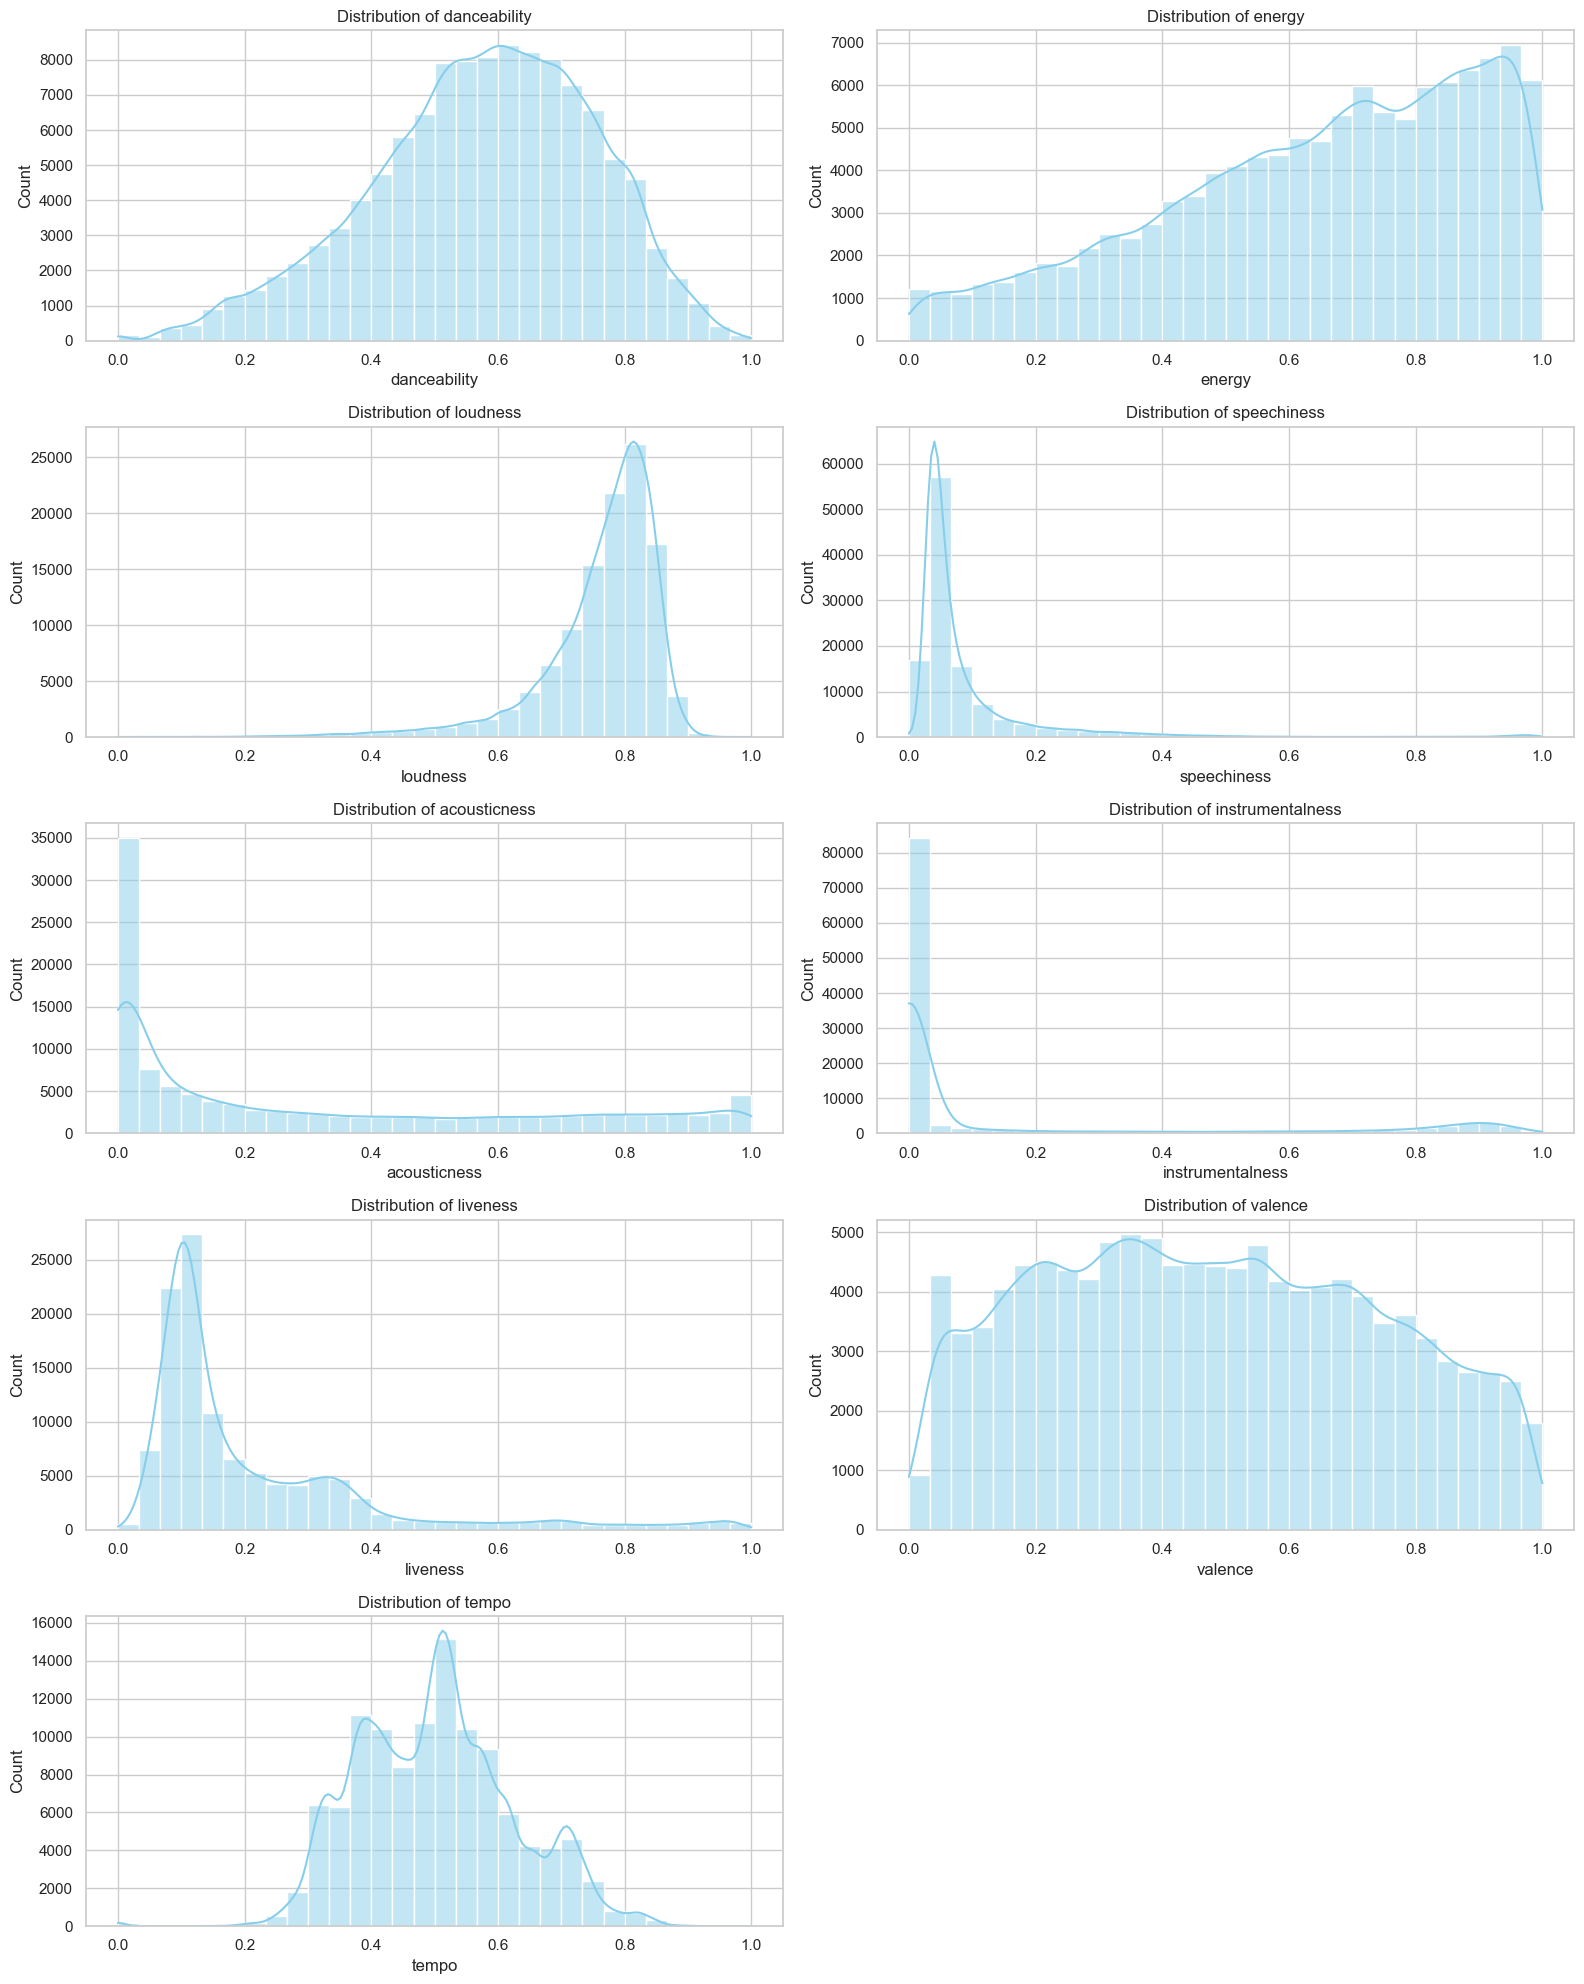

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

for i, col in enumerate(features):
    plt.subplot(5, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

 - correlation heatmap

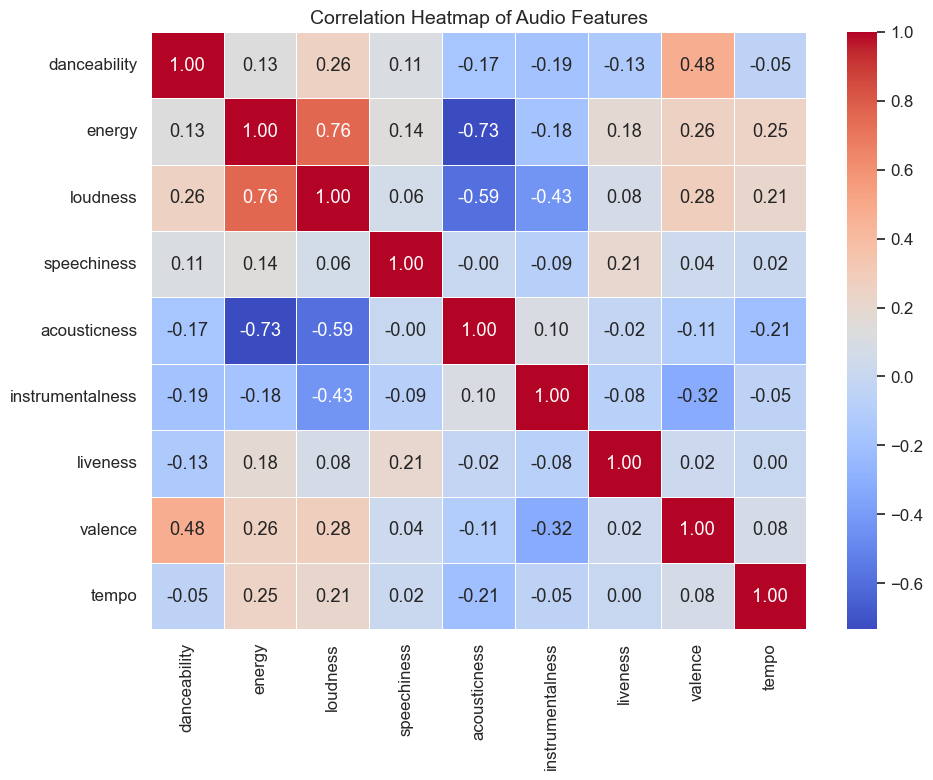

In [24]:
corr_matrix = df[[
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]].corr()

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Audio Features", fontsize=14)
plt.tight_layout()
plt.show()

### Key Points from Correlation Heatmap

- **Energy - Loudness**: Strong positive correlation  
  → Louder songs tend to be more energetic.

- **Danceability - Valence**: Moderately positive  
  → Happy songs are often more danceable.

- **Energy - Acousticness**: Strong negative correlation  
  → Acoustic tracks are usually less energetic.

- **Loudness - Acousticness**: Negative  
  → Acoustic tracks are typically quieter.

- **Speechiness**: Weak correlation  
  → Varies independently (e.g., podcasts, rap).

- **Instrumentalness**: No strong correlation  
  → Doesn’t follow patterns with other features.


### (4) MODEL TRAINING AND EVALUATION 

- knn 

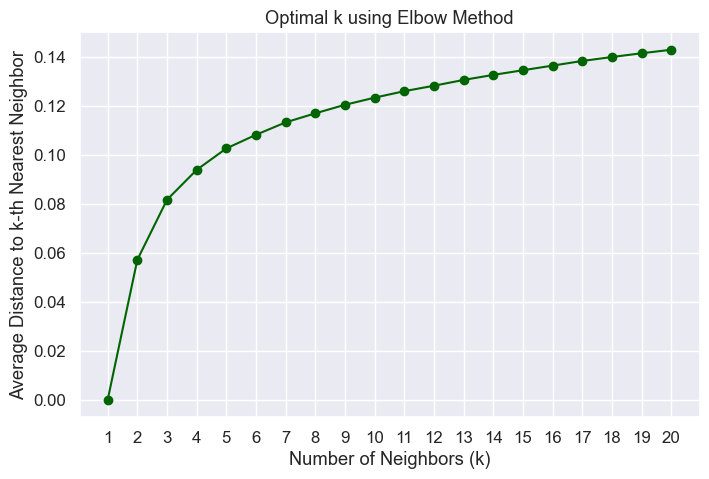

In [28]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

X = df[features]

k_range = range(1, 21)
avg_distances = []

for k in k_range:
    model = NearestNeighbors(n_neighbors=k)
    model.fit(X)
    distances, _ = model.kneighbors(X)
    
    # For each sample, take the distance to its kth neighbor
    kth_distances = distances[:, -1]
    avg_distances.append(np.mean(kth_distances))

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, avg_distances, marker='o', color='darkgreen')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance to k-th Nearest Neighbor')
plt.title('Optimal k using Elbow Method')
plt.grid(True)
plt.xticks(k_range)
plt.show()


In [76]:
from sklearn.neighbors import NearestNeighbors

Recommendations for: Shape Of You by Andrew Foy


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,track_name,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
76731,Les Indes Galantes - Air pour les esclaves afr...,Jean-Philippe Rameau;Jordi Savall;Le Concert D...,0.582741,0.277,0.582968,0.028912,0.780120,0.787,0.1060,0.738693,0.351429
54478,Sink Lateral,Ilkae,0.688325,0.401,0.733515,0.057513,0.974900,0.947,0.1050,0.923618,0.339456
7404,Reno Ride,Clarence White,0.509645,0.317,0.620942,0.036477,0.935743,0.902,0.0999,0.929648,0.458561
64754,Inner Courage,Mr. Käfer;Eu93ne,0.726904,0.321,0.719938,0.084352,0.914659,0.912,0.1000,0.968844,0.591855


In [78]:
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(df[features])

NearestNeighbors(algorithm='brute', metric='cosine')

In [80]:
import pickle

with open('nearest_neighbors_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [174]:
def recommend_by_title(title, top_n=5):
    title = title.lower()
    matches = df[df['track_name'].str.lower() == title]
    
    if matches.empty:
        return None, "Song not found. Please check the spelling or try a different name."
    
    index = matches.index[0]
    distances, indices = model.kneighbors([df.loc[index, features]], n_neighbors=top_n + 1)

    print(f"\nRecommendations for: {df.loc[index, 'track_name']} by {df.loc[index, 'artists']}")
    recs = df.iloc[indices[0][1:]] 
    return recs[['track_name', 'artists']], None

song = input("Enter a song name: ")
results, error = recommend_by_title(song)

if error:
    print(error)
else:
    print("\nTop Recommendations:")
    for i, row in results.iterrows():
        print(f"{row['track_name']} by {row['artists']}")

Enter a song name:  Shape of You



Recommendations for: Shape Of You by Andrew Foy

Top Recommendations:
Les Indes Galantes - Air pour les esclaves africains by Jean-Philippe Rameau;Jordi Savall;Le Concert Des Nations
Sink Lateral by Ilkae
Reno Ride by Clarence White
Inner Courage by Mr. Käfer;Eu93ne
Keali'i's Mele by Danny Carvalho


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [164]:
def recommend_by_keyword_knn(keyword, top_n=5):
    keyword = keyword.lower()

    matched = df[df['track_name'].str.lower().str.contains(keyword)]
    if matched.empty:
        return []

    # Use the average feature vector of matched songs
    query_vector = matched[features].mean().values.reshape(1, -1)

    # Find nearest neighbors using scaled vector
    scaled_query = scaler.transform(query_vector)
    distances, indices = model.kneighbors(scaled_query, n_neighbors=top_n + len(matched))

    # Filter out input songs
    results = df.iloc[indices[0]]
    results = results[~results['track_name'].str.lower().str.contains(keyword)]

    return results[['track_name', 'artists']].drop_duplicates().head(top_n).values.tolist()

keyword = input("Enter a mood/keyword (e.g., happy, love): ")
results = recommend_by_keyword_knn(keyword)

if not results:
    print("No recommendations found for this keyword.")
else:
    print("Top Recommendations by Keyword:")
    for i, (song, artist) in enumerate(results):
        print(f"{i+1}. {song} by {artist}")

Enter a mood/keyword (e.g., happy, love):  Love


Top Recommendations by Keyword:
1. Hold You - Hold Yuh by Gyptian
2. Radioactive by Mini Pop Kids
3. Adios by Hoody;GRAY
4. Finish Line by SATV Music
5. Sensation by MadeInParis


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [168]:
def recommend_by_artist_knn(artist, top_n=5):
    artist = artist.lower()

    artist_songs = df[df['artists'].str.lower().str.contains(artist)]
    if artist_songs.empty:
        return []

    # Use average of artist's songs
    artist_vector = artist_songs[features].mean().values.reshape(1, -1)

    # KNN search
    scaled_query = scaler.transform(artist_vector)
    distances, indices = model.kneighbors(scaled_query, n_neighbors=top_n + len(artist_songs))

    results = df.iloc[indices[0]]
    results = results[~results['artists'].str.lower().str.contains(artist)]

    return results[['track_name', 'artists']].drop_duplicates().head(top_n).values.tolist()

artist = input("Enter the artist's name: ")
results = recommend_by_artist_knn(artist)

if not results:
    print("No similar songs found for this artist.")
else:
    print("Top Recommendations by Artist:")
    for i, (song, artist) in enumerate(results):
        print(f"{i+1}. {song} by {artist}")

Enter the artist's name:  Imagine Dragons


Top Recommendations by Artist:
1. All Mine by Portishead
2. Wild (feat. Gary Clark Jr.) by John Legend;Gary Clark Jr.
3. All I Have Is My Smile by LIL DUSTY G
4. FEVER by ENHYPEN
5. Shake It Up (Neon Steve Remix) - Mixed by Stanton Warriors;The Beatnuts;Neon Steve


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


   - Evaluation

In [85]:
from sklearn.metrics import silhouette_score

In [101]:
distances, indices = model.kneighbors(df[features])
pseudo_labels = np.array([tuple(sorted(neigh)) for neigh in indices])
_, unique_labels = np.unique(pseudo_labels, axis=0, return_inverse=True)
knn_silhouette = silhouette_score(df[features], unique_labels)

- K-Means

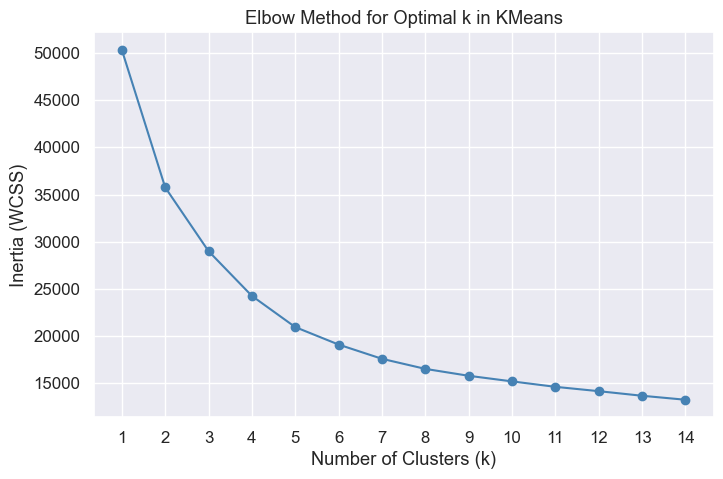

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', color='steelblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k in KMeans')
plt.grid(True)
plt.xticks(k_range)
plt.show()


In [72]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

In [74]:
import pickle
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump((kmeans, scaler), f)

In [155]:
def recommend_by_artist_kmeans(artist):
    artist_songs = df[df['artists'].str.lower().str.contains(artist.lower())]
    
    if artist_songs.empty:
        return []
    
    reference_song = artist_songs.iloc[0]
    cluster_id = reference_song['cluster']
    
    similar = df[
        (df['cluster'] == cluster_id) &
        (df['artists'].str.lower().str.contains(artist.lower())) &
        (df['track_name'] != reference_song['track_name'])
    ]
    
    return similar[['track_name', 'artists']].drop_duplicates().head(5).values.tolist()

artist = input("Enter the artist's name: ")

results = recommend_by_artist_kmeans(artist)

if not results:
    print("No similar songs found for this artist in the same cluster.")
else:
    print("Top Recommendations:")
    for i, (song, artist) in enumerate(results):
        print(f"{i+1}. {song} by {artist}")

Enter the artist's name:  Imagine Dragons


Top Recommendations:
1. Thunder by Imagine Dragons
2. Believer by Imagine Dragons
3. Bones by Imagine Dragons
4. Whatever It Takes by Imagine Dragons
5. Demons by Imagine Dragons


In [157]:
def recommend_by_name(song_name):
    song = df[df['track_name'].str.lower() == song_name.lower()]
    if song.empty:
        return []
    cluster_label = song['cluster'].values[0]
    similar_songs = df[(df['cluster'] == cluster_label) & (df['track_name'].str.lower() != song_name.lower())]
    return similar_songs[['track_name', 'artists']].drop_duplicates().head(5).values.tolist()

song = input("Enter a song name: ")
results = recommend_by_name(song)
if not results:
    print("Song not found in dataset.")
else:
    print("Top Recommendations:")
    for i, (song, artist) in enumerate(results):
        print(f"{i+1}. {song} by {artist}")

Enter a song name:  Shape of You


Top Recommendations:
1. And I Love Her by Kurt Cobain
2. Chi Mai by Joseph Sullinger
3. Mujer con Abanico by Agustín Amigó;Nylonwings
4. La La La (Something In the Rain, Pt. 2) [Music from the Original TV Series] by Rachael Yamagata
5. A Thousand Years by Eddy Tyler


In [159]:
def recommend_by_keyword(keyword):
    keyword = keyword.lower()

    matched = df[df['track_name'].str.lower().str.contains(keyword)]
    if matched.empty:
        return []

    clusters = matched['cluster'].mode()
    if clusters.empty:
        return []

    cluster_id = clusters.iloc[0]
    recommendations = df[(df['cluster'] == cluster_id) & (~df['track_name'].str.lower().str.contains(keyword))]

    return recommendations[['track_name', 'artists']].drop_duplicates().head(5).values.tolist()

keyword = input("Enter a mood/keyword (e.g., happy, love): ")
results = recommend_by_keyword(keyword)

if not results:
    print("No recommendations found for this keyword.")
else:
    print("Top Recommendations:")
    for i, (song, artist) in enumerate(results):
        print(f"{i+1}. {song} by {artist}")

Enter a mood/keyword (e.g., happy, love):  Love


Top Recommendations:
1. Comedy by Gen Hoshino
2. Days I Will Remember by Tyrone Wells
3. Lucky by Jason Mraz;Colbie Caillat
4. Hold On - Remix by Chord Overstreet;Deepend
5. Unlonely by Jason Mraz


- Evaluation

In [105]:
kmeans_labels = kmeans.fit_predict(df[features])
kmeans_silhouette = silhouette_score(df[features], kmeans_labels)

- Comparision

In [109]:
models = ['KMeans', 'KNN']
scores = [kmeans_silhouette, knn_silhouette]

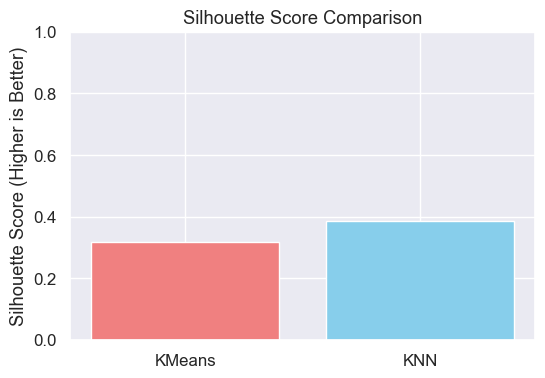

In [111]:
plt.figure(figsize=(6, 4))
plt.bar(models, scores, color=['lightcoral', 'skyblue'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score (Higher is Better)')
plt.ylim(0, 1)
plt.show()

In [113]:
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")
print(f"KNN Silhouette Score (pseudo-cluster): {knn_silhouette:.4f}")

KMeans Silhouette Score: 0.3183
KNN Silhouette Score (pseudo-cluster): 0.3864


#### KNN Performs better

### (5) DEPLOYMENT

In [121]:
import gradio as gr

In [133]:
X_scaled = df[features]

In [176]:
import gradio as gr

def knn_ui_router(mode, query, top_n):
    if mode == "By Title":
        results, error = recommend_by_title(query, top_n)
        if error:
            return [[error, ""]]
        return results[['track_name', 'artists']].values.tolist()

    elif mode == "By Artist":
        return recommend_by_artist_knn(query, top_n)

    elif mode == "By Mood/Keyword":
        return recommend_by_keyword_knn(query, top_n)

    return [["Invalid mode selected.", ""]]

# Gradio UI
gr.Interface(
    fn=knn_ui_router,
    inputs=[
        gr.Dropdown(["By Title", "By Artist", "By Mood/Keyword"], label="Recommendation Mode"),
        gr.Textbox(label="Enter Song Title / Artist / Keyword"),
        gr.Slider(minimum=1, maximum=10, value=5, step=1, label="Number of Recommendations")
    ],
    outputs=gr.Dataframe(headers=["Track Name", "Artist"], label="Recommended Songs"),
    title="🎧 KNN-Based Music Recommender",
    description="Pick a recommendation mode and get song suggestions using KNN!"
).launch()


* Running on local URL:  http://127.0.0.1:7877

To create a public link, set `share=True` in `launch()`.
